# Hand Recognition

In [6]:
import numpy as np 
import pandas as pd  
import os 
import pathlib
import glob

import seaborn as sns 
import matplotlib.pyplot as plt 

import tensorflow as tf  
from tensorflow.keras import layers
from tensorflow.keras import Model  
from tensorflow.keras.optimizers import RMSprop
from keras_preprocessing.image import ImageDataGenerator

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Import of the images 
and create dataframe


In [7]:
#Image paramters
batch_size = 10
img_height = 300
img_width = 300

#image directories
image_dir = data_dir = pathlib.Path("../dataset/processed/")   #Setting image directory

#creating dataset with validation split
train_ds = tf.keras.utils.image_dataset_from_directory(
  image_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
  
class_names = train_ds.class_names




Found 12575 files belonging to 2 classes.
Using 8803 files for training.
Found 12575 files belonging to 2 classes.
Using 2515 files for validation.


Data Augmentation

In [11]:
from tensorflow import keras

IMG_SIZE = 300

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

LeNet-5 CNN Architecture 


In [12]:

num_classes = len(class_names)

model = Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=5
#history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)



Epoch 1/5
 54/881 [>.............................] - ETA: 5:01 - loss: 0.2001 - accuracy: 0.9500

KeyboardInterrupt: 

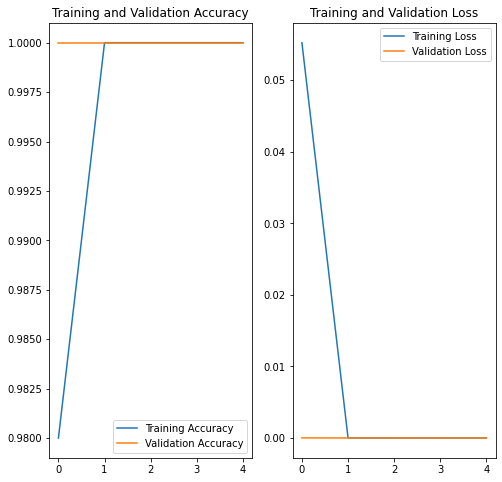

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()